In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
matches = pd.read_csv('IPL_matches.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05/05/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07/05/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08/05/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10/05/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
matches.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [8]:
matches.win_by_runs.mean()

13.283068783068783

In [9]:
#Change Datatypes as per requirement

matches.dl_applied = matches.dl_applied.astype(bool)
matches.date = pd.to_datetime(matches.date)

In [10]:
matches.dtypes

id                          int64
Season                     object
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                   bool
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

In [11]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
matches.drop(columns = ["umpire1","umpire2","umpire3"],axis = 1,inplace = True)

In [13]:
matches.shape

(756, 15)

In [14]:
matches.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [15]:
#matches.fillna(np.nan)
mode_city = max(matches.city.value_counts())
mode_city

101

In [16]:
matches.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Cuttack             7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

In [17]:
matches.city.fillna(mode_city,inplace = True)

In [18]:
matches.city.isnull().sum()

0

In [19]:
matches[matches.winner.isnull()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,False,NaN,0,0,NaN,Feroz Shah Kotla
545,546,IPL-2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,False,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,False,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,IPL-2019,Bengaluru,2019-04-30,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,False,NaN,0,0,NaN,M. Chinnaswamy Stadium


In [20]:
no_result_matches = matches[matches.result == 'no result'] #storing no result matches in a variable
matches = matches[matches.winner.isnull() == False] #drop 4 rows and keep 752 rows

In [21]:
matches[matches.winner.isnull()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue


In [22]:
matches.describe() 

,id,win_by_runs,win_by_wickets
count,752.000000,752.000000,752.000000
mean,1784.746011,13.353723,3.368351
std,3455.152925,23.513486,3.388114
min,1.000000,0.000000,0.000000
25%,188.750000,0.000000,0.000000
50%,377.500000,0.000000,4.000000
75%,566.250000,19.000000,6.000000
max,11415.000000,146.000000,10.000000


In [23]:
matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               752 non-null    int64         
 1   Season           752 non-null    object        
 2   city             752 non-null    object        
 3   date             752 non-null    datetime64[ns]
 4   team1            752 non-null    object        
 5   team2            752 non-null    object        
 6   toss_winner      752 non-null    object        
 7   toss_decision    752 non-null    object        
 8   result           752 non-null    object        
 9   dl_applied       752 non-null    bool          
 10  winner           752 non-null    object        
 11  win_by_runs      752 non-null    int64         
 12  win_by_wickets   752 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            752 non-null    object   

In [25]:
matches['id'].nunique()

752

In [26]:
matches['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [27]:
matches.Season.nunique()

12

In [28]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                                  44
Season                        IPL-2017
city                             Delhi
date               2017-06-05 00:00:00
team1                   Mumbai Indians
team2                 Delhi Daredevils
toss_winner           Delhi Daredevils
toss_decision                    field
result                          normal
dl_applied                       False
winner                  Mumbai Indians
win_by_runs                        146
win_by_wickets                       0
player_of_match            LMP Simmons
venue                 Feroz Shah Kotla
Name: 43, dtype: object

In [29]:
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
Season                                           IPL-2017
city                                               Rajkot
date                                  2017-07-04 00:00:00
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                          False
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
Name: 2, dtype: object

In [30]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
Season                                              IPL-2017
city                                               Hyderabad
date                                     2017-05-21 00:00:00
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                             False
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
Name: 58, dtype: object

In [31]:
matches[matches[matches['win_by_runs'].ge(1)].win_by_runs.min() == matches['win_by_runs']]['winner']  #to handle the issue of only one team being shown

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
734    Royal Challengers Bangalore
755                 Mumbai Indians
Name: winner, dtype: object

In [32]:
matches[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.min() == matches['win_by_wickets']][['winner','win_by_wickets']]  #to handle the issue of only one team being shown

,winner,win_by_wickets
559,Kolkata Knight Riders,1
636,Chennai Super Kings,1
642,Sunrisers Hyderabad,1


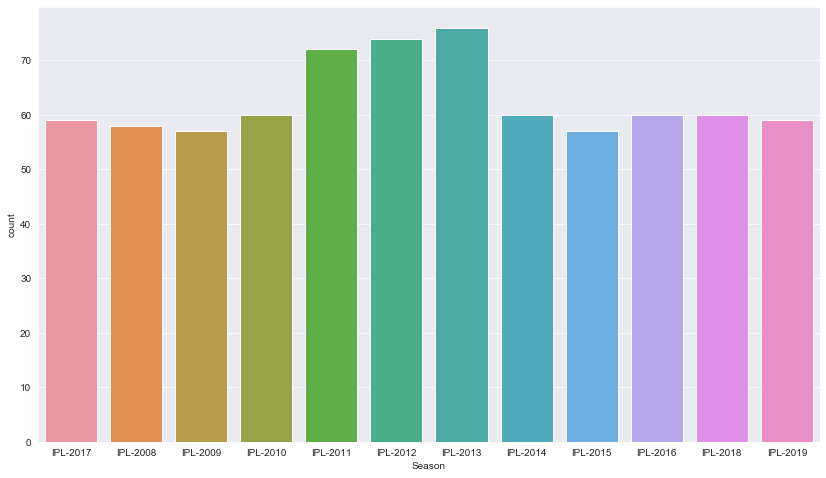

In [33]:
sns.countplot(x='Season', data=matches)
plt.show()

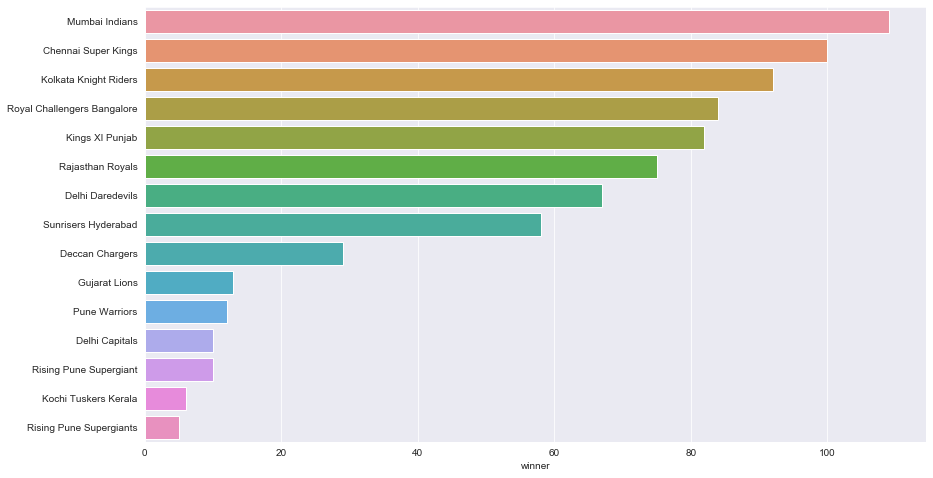

In [34]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

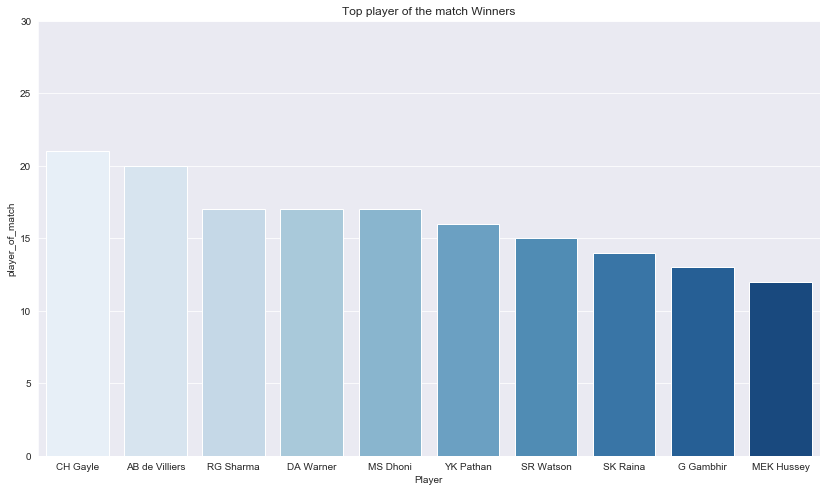

In [35]:
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,30])
ax.set_ylabel("Count of player of match")
ax.set_xlabel("Player")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v',palette="Blues")
plt.show()

In [36]:
ss = matches['toss_winner'] == matches['winner']

ss.groupby(ss).size()

False    359
True     393
dtype: int64

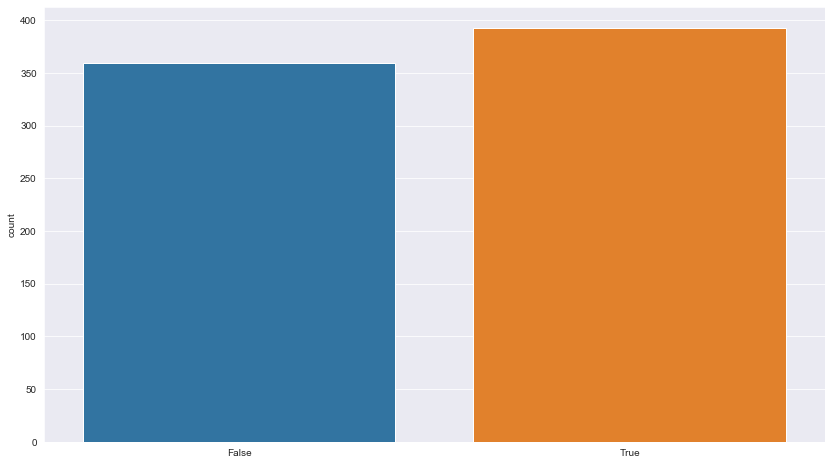

In [37]:
sns.countplot(ss)

In [38]:
s = round(ss.groupby(ss).size() / ss.count() * 100,2)
s

False    47.74
True     52.26
dtype: float64

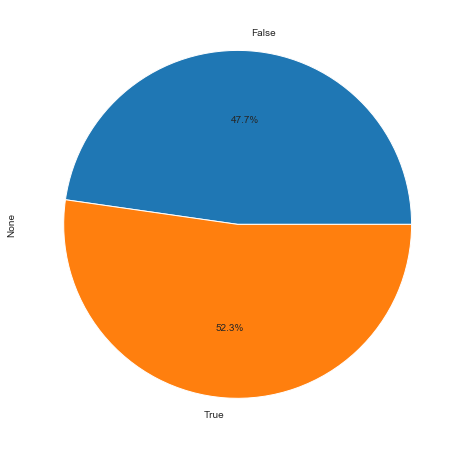

In [39]:
s.plot.pie(autopct="%.1f%%")

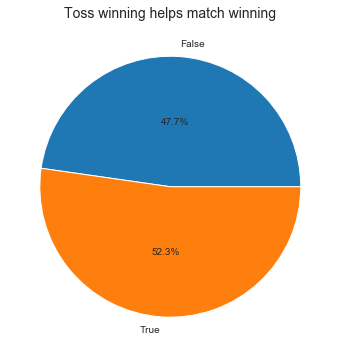

In [40]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = s.keys()
plt.pie(x=s, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Toss winning helps match winning", fontsize=14);
#plt.savefig("Toss.png")

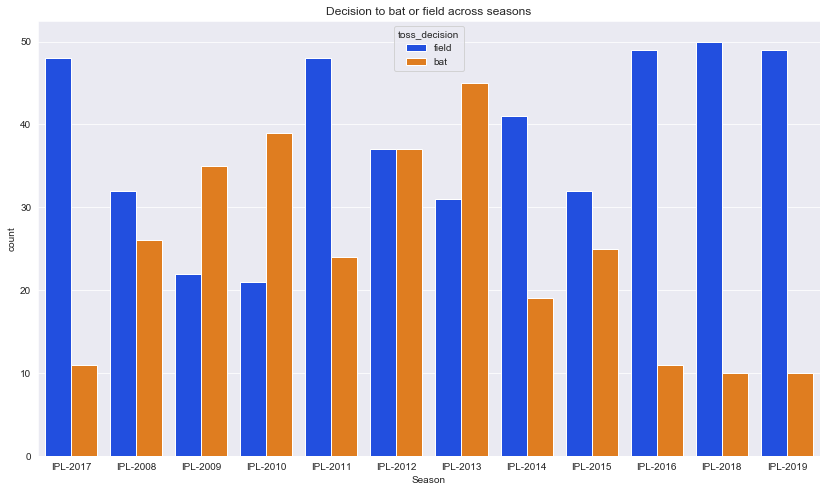

In [41]:
sns.countplot(x='Season',hue='toss_decision',data=matches,palette=sns.color_palette('bright'))
plt.title("Decision to bat or field across seasons")
plt.show()

In [42]:
#did fielding decision help in winning matches?
match_winner_by_field=matches[matches["toss_decision"]=='field'][['toss_winner', 'winner']]
match_winner_by_field['toss_win_flag']=match_winner_by_field['toss_winner']==match_winner_by_field['winner']
match_winner_by_field.groupby(match_winner_by_field.toss_win_flag).size()

toss_win_flag
False    201
True     259
dtype: int64

Text(0.5, 1.0, 'Fielding first helps in match winning')

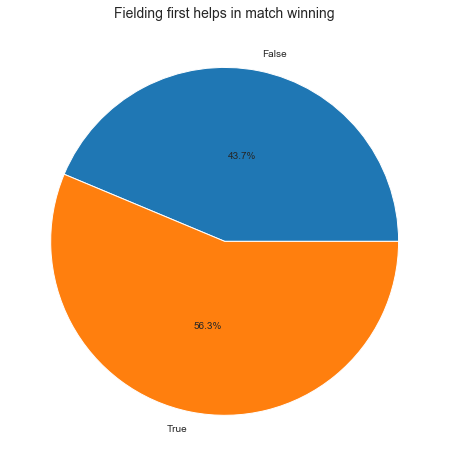

In [43]:
a=match_winner_by_field.groupby(match_winner_by_field.toss_win_flag).size()
labels=a.keys()
plt.pie(x=a,autopct="%.1f%%",labels=labels,pctdistance=0.5)
plt.title("Fielding first helps in match winning",fontsize=14)

In [44]:
#Venue and city analysis
print("Total no. of cities played:",matches['city'].nunique())
print("Total no. of venues played:",matches['venue'].nunique())

Total no. of cities played: 33
Total no. of venues played: 41


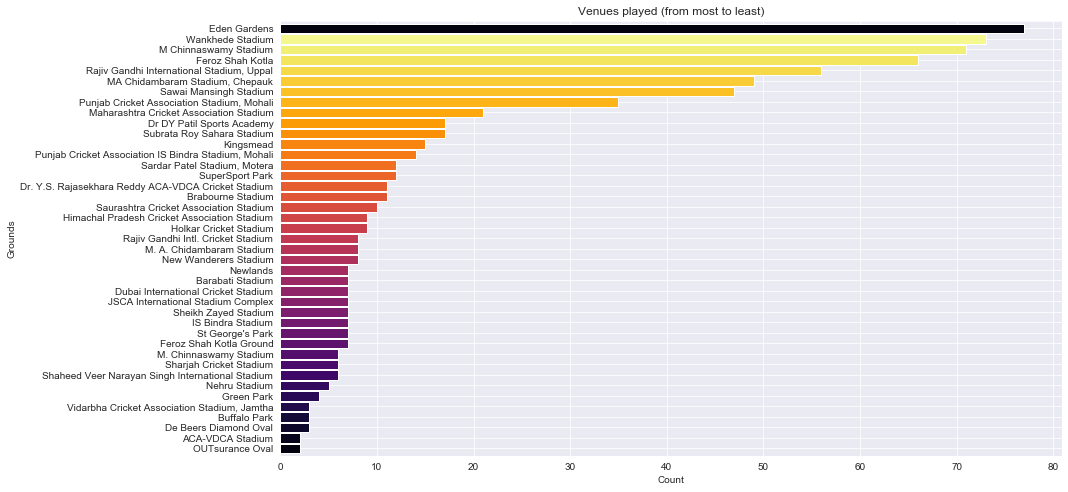

In [45]:
ax=matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette("inferno",40))
ax.set_xlabel("Count")
ax.set_ylabel("Grounds")
plt.title("Venues played (from most to least)")
plt.show()

In [46]:
ipldelivery = pd.read_csv('deliveries.csv')

In [47]:
ipldelivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [48]:
ipldelivery.shape

(179078, 21)

In [49]:
ipldelivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [50]:
batsman_grp = ipldelivery.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40


In [51]:
balls_faced = ipldelivery[ipldelivery["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
balls_faced.head()

,match_id,inning,batsman,balls_faced
0,1,1,BCJ Cutting,6
1,1,1,DA Warner,8
2,1,1,DJ Hooda,12
3,1,1,MC Henriques,37
4,1,1,S Dhawan,31


In [52]:
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

In [53]:
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0


In [54]:
fours = ipldelivery[ ipldelivery["batsman_runs"] == 4]
sixes = ipldelivery[ ipldelivery["batsman_runs"] == 6]

fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [55]:
fours_per_batsman.head()

,match_id,inning,batsman,4s
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2


In [56]:
batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

In [57]:
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,NaN,2.0
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,NaN,1.0
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,NaN


In [58]:
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

In [59]:
for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

In [60]:
dismissals = ipldelivery[ pd.notnull(ipldelivery["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = matches[['id','Season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head(10)

,Season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,IPL-2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67,NaN,NaN
1,IPL-2017,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00,caught,Mandeep Singh
2,IPL-2017,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,0.0,1.0,133.33,NaN,NaN
3,IPL-2017,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54,caught,Sachin Baby
4,IPL-2017,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,0.0,129.03,caught,Sachin Baby
5,IPL-2017,1,1,Sunrisers Hyderabad,Yuvraj Singh,62,27.0,7.0,3.0,229.63,bowled,NaN
6,IPL-2017,1,2,Royal Challengers Bangalore,A Choudhary,6,2.0,0.0,1.0,300.00,NaN,NaN
7,IPL-2017,1,2,Royal Challengers Bangalore,CH Gayle,32,21.0,2.0,3.0,152.38,caught,DA Warner
8,IPL-2017,1,2,Royal Challengers Bangalore,KM Jadhav,31,16.0,4.0,1.0,193.75,run out,BCJ Cutting
9,IPL-2017,1,2,Royal Challengers Bangalore,Mandeep Singh,24,16.0,5.0,0.0,150.00,bowled,NaN


In [61]:
## Bowlers grouped by sets of data
# Data is grouped for bowlers to provide greater depth of information. Very important for the regression analysis.

bowler_grp = ipldelivery.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])
bowlers = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

bowlers["runs"] = bowlers["total_runs"] - (bowlers["bye_runs"] + bowlers["legbye_runs"])
bowlers["extras"] = bowlers["wide_runs"] + bowlers["noball_runs"]

del( bowlers["bye_runs"])
del( bowlers["legbye_runs"])
del( bowlers["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = ipldelivery[ipldelivery["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

bowlers = bowlers.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
bowlers["wickets"] = bowlers["wickets"].fillna(0)

bowlers_over = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
bowlers = bowlers.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
bowlers = bowlers_over.merge(bowlers, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
bowlers['Econ'] = np.round(bowlers['runs'] / bowlers['over'] , 2)
bowlers = matches[['id','Season']].merge(bowlers, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

bowlers.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,IPL-2017,1,1,Royal Challengers Bangalore,A Choudhary,4,3,1,55,4,1.0,13.75
1,IPL-2017,1,1,Royal Challengers Bangalore,S Aravind,3,0,0,36,0,0.0,12.00
2,IPL-2017,1,1,Royal Challengers Bangalore,SR Watson,3,0,0,41,0,0.0,13.67
3,IPL-2017,1,1,Royal Challengers Bangalore,STR Binny,1,0,0,10,0,1.0,10.00
4,IPL-2017,1,1,Royal Challengers Bangalore,TM Head,1,0,0,11,0,0.0,11.00
5,IPL-2017,1,1,Royal Challengers Bangalore,TS Mills,4,2,0,31,2,1.0,7.75
6,IPL-2017,1,1,Royal Challengers Bangalore,YS Chahal,4,0,0,22,0,1.0,5.50
7,IPL-2017,1,2,Sunrisers Hyderabad,A Nehra,4,1,0,42,1,2.0,10.50
8,IPL-2017,1,2,Sunrisers Hyderabad,B Kumar,4,1,0,27,1,2.0,6.75
9,IPL-2017,1,2,Sunrisers Hyderabad,BCJ Cutting,4,2,0,35,2,0.0,8.75


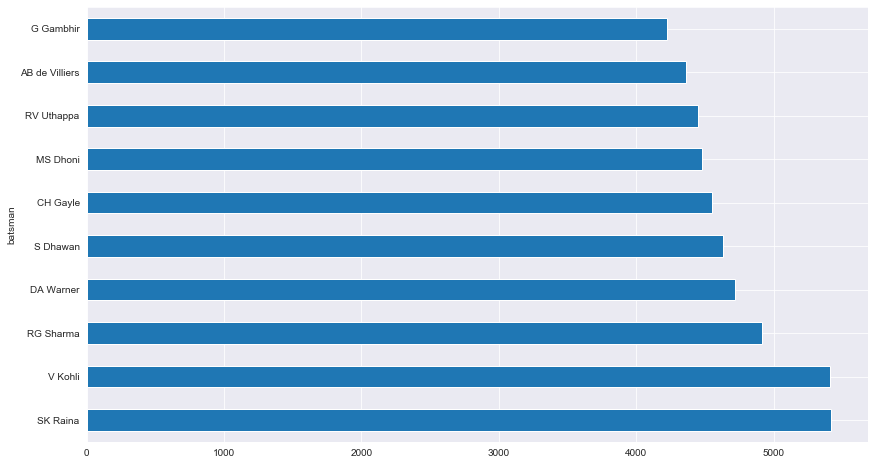

In [62]:
runs_scored=batsmen.groupby(['batsman'])['batsman_runs'].sum()
runs_scored=runs_scored.sort_values(ascending=False)
top10runs = runs_scored.head(10)
top10runs.plot(kind = 'barh')

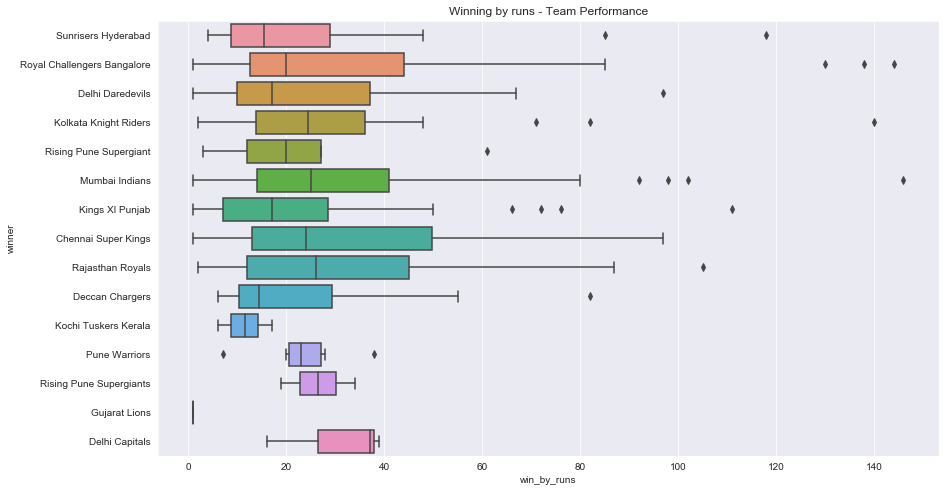

In [63]:
#boxplot of runs
fig,ax=plt.subplots()
ax.set_xlabel("Runs")
ax.set_title("Winning by runs - Team Performance")
sns.boxplot(y='winner',x='win_by_runs',data=matches[matches['win_by_runs']>0],orient='h')
plt.show()

In [64]:
#Encoding
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW','DC'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DCh':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DCh':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DCh':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DCh':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14,'Draw':15}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,2017-05-04,10,3,3,field,normal,False,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,2017-06-04,1,11,11,field,normal,False,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium


In [65]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11


In [66]:
df = pd.DataFrame(matches)
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors],data[outcome])
  predictions = model.predict(data[predictors])
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print('Accuracy : %s' % '{0:.3%}'.format(accuracy))
  
  model.fit(data[predictors],data[outcome])

In [68]:
#from sklearn.ensemble import RandomForestRegressor
outcome_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression(max_iter = 1000)
classification_model(model, df,predictor_var,outcome_var)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy : 25.000%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
#Building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod=['city','toss_decision','venue']
le=LabelEncoder()
for i in var_mod:
    df[i]=le.fit_transform(df[i].astype('str'))
df.dtypes  

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [70]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
outcome_var=['winner']
predictor_var = ['team1','team2','venue','toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy : 88.165%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [71]:
dicVal=encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)])

1
MI


In [72]:
team1="RCB"
team2="KKR"
toss_winner="RCB"
input=[dicVal[team1],dicVal[team2],'14',dicVal[toss_winner],'2','1']
input=np.array(input).reshape((1,-1))
output=model.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)])

KKR


In [73]:
imp_input=pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
print(imp_input)

team2            0.247683
team1            0.221497
venue            0.177542
toss_winner      0.169104
city             0.154111
toss_decision    0.030062
dtype: float64


In [75]:
# Creating a pickle file for the classifier
import pickle
filename = 'match_winner_model.pkl'
pickle.dump(model, open(filename, 'wb'))
